<img src='figures/logo.png'>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#É-hora-de-construir-um-modelo!" data-toc-modified-id="É-hora-de-construir-um-modelo!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>É hora de construir um modelo!</a></span><ul class="toc-item"><li><span><a href="#Avaliação" data-toc-modified-id="Avaliação-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Avaliação</a></span><ul class="toc-item"><li><span><a href="#O-que-aconteceu-aqui?-Acertamos-tudo-:o" data-toc-modified-id="O-que-aconteceu-aqui?-Acertamos-tudo-:o-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>O que aconteceu aqui? Acertamos tudo :o</a></span></li></ul></li><li><span><a href="#Controlando-os-parametros-da-árvore" data-toc-modified-id="Controlando-os-parametros-da-árvore-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Controlando os parametros da árvore</a></span></li></ul></li><li><span><a href="#Treino-e-Teste" data-toc-modified-id="Treino-e-Teste-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Treino e Teste</a></span></li><li><span><a href="#Importância-das-variáveis" data-toc-modified-id="Importância-das-variáveis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importância das variáveis</a></span></li><li><span><a href="#Análise-dos-Resultados" data-toc-modified-id="Análise-dos-Resultados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Análise dos Resultados</a></span></li></ul></div>

# É hora de construir um modelo!

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from graphviz import render

Vamos carregar aqui aqueles dados que nós contruimos na etapa de Preparação dos dados:

In [2]:
df_modelo = pd.read_csv('df_modelo.csv')
df_modelo.shape
                    

(20185, 10)

In [3]:
df_modelo.head()

,Unnamed: 0,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,What is your age (# years)?,How many years of experience do you have in your current role?,What is your current yearly compensation (approximate $USD)?
0,2,1,8,0,2,12,9,34,10,20
1,3,0,11,3,1,7,7,34,1,10
2,5,1,5,3,8,4,7,24,1,10
3,6,1,8,0,11,7,3,29,1,0
4,7,1,8,1,7,12,0,39,15,20


In [4]:
df_modelo = df_modelo.drop('Unnamed: 0', axis=1)

O dataframe X, contém apenas as variáveis que descrevem os individuos e o y apenas a variável resposta, nesse caso, o valor que eles ganham anualmente

In [5]:
X = df_modelo.drop('What is your current yearly compensation (approximate $USD)?', axis=1)
y = df_modelo['What is your current yearly compensation (approximate $USD)?']

In [6]:
print(X.shape)
print(y.shape)

(20185, 8)
(20185,)


In [8]:
X

,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,What is your age (# years)?,How many years of experience do you have in your current role?
0,1,8,0,2,12,9,34,10
1,0,11,3,1,7,7,34,1
2,1,5,3,8,4,7,24,1
3,1,8,0,11,7,3,29,1
4,1,8,1,7,12,0,39,15
...,...,...,...,...,...,...,...,...
20180,1,4,3,1,2,18,44,15
20181,0,5,3,1,4,7,21,2
20182,1,8,1,1,15,0,34,10
20183,1,3,1,1,1,3,49,10


Vamos usar uma arvore de decisão aqui! 

Esse tipo de algoritmo é muito interessante, porque é fácil entender porque ele classificou uma amostra em um determinado valor. Isso porque ele funciona como se fosse feitas uma series de perguntas e então chega-se a uma conclusão.É uma estratégia conhecida como dividir para conquistar: um problema complexo é decomposto em sub-problemas mais simples e recursivamente esta técnica é aplicada a cada sub-problema 

Com esse tipo de algoritmo normalmente não precisamos escalar os dados, ele consegue lidar com dados que não são separados linearmente e a importância dos atributos é revelada e fácil de explicar

In [9]:
y

0         20
1         10
2         10
3          0
4         20
        ... 
20180      0
20181      0
20182     20
20183    300
20184     20
Name: What is your current yearly compensation (approximate $USD)?, Length: 20185, dtype: int64

In [10]:
# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_1.fit(X, y)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
# Predict
y_pred = regr_1.predict(X)

In [12]:
y_pred

array([ 20.        ,  10.        ,   5.        , ...,  13.33333333,
       300.        ,  15.33333333])

## Avaliação

<img src='figures/residuals-represent-error-jpg_1.jpg'>


In [13]:
from sklearn.metrics import r2_score # quanto mais proximo de 1 melhor o modelo
print(r2_score(y, regr_1.predict(X)))

0.9597834207659492


In [14]:
from sklearn.metrics import mean_absolute_error  # desvio médio entre observado e predito.
mean_absolute_error(y, y_pred)

2.8716238368083107

### O que aconteceu aqui? Acertamos tudo :o

<img src='figures/overfitting.png'>

## Controlando os parametros da árvore

A árvore estende a sua profundidade até o ponto de classificar perfeitamente os elementos do conjunto de treinamento. Para evitar isso, nós podemos evitar que a árvore cresça de maneira a superajustar os dados: 

In [15]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X, y)

# Predict
y_pred = regr_1.predict(X)

In [16]:
mean_absolute_error(y, y_pred)

28.60876829421268

# Treino e Teste

Outra abordagem muito importante para entendermos se está acontecendo um superajuste, é a divisão dos dados em conjuntos de treino e teste: 

<img src='figures/crossvalidation.png'>

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [20]:
X_test.shape

(4037, 8)

In [21]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)

# Predict
y_pred = regr_1.predict(X_test)

In [22]:
mean_absolute_error(y_test, y_pred)

28.65735690272959

In [23]:
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regr_1, out_file ='tree.dot')  

render('dot', 'png', 'tree.dot')  

'tree.dot.png'

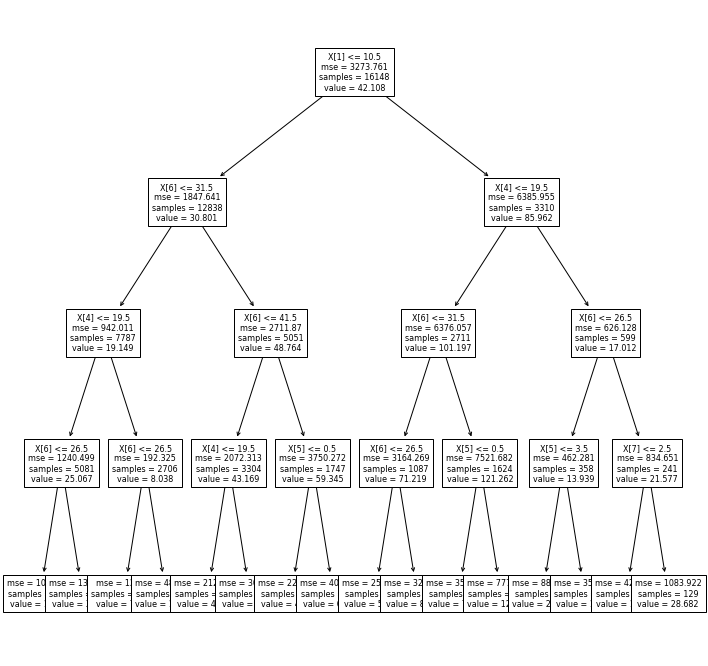

In [24]:
from sklearn import tree

# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(regr_1, fontsize=8)
plt.show()


In [25]:
X

,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,What is your age (# years)?,How many years of experience do you have in your current role?
0,1,8,0,2,12,9,34,10
1,0,11,3,1,7,7,34,1
2,1,5,3,8,4,7,24,1
3,1,8,0,11,7,3,29,1
4,1,8,1,7,12,0,39,15
...,...,...,...,...,...,...,...,...
20180,1,4,3,1,2,18,44,15
20181,0,5,3,1,4,7,21,2
20182,1,8,1,1,15,0,34,10
20183,1,3,1,1,1,3,49,10


# Importância das variáveis 

In [26]:
from matplotlib import pyplot

In [27]:
importance = regr_1.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.45205
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.23385
Feature: 5, Score: 0.03213
Feature: 6, Score: 0.28117
Feature: 7, Score: 0.00079


In [30]:
importance

array([0.        , 0.45205132, 0.        , 0.        , 0.23385259,
       0.03213349, 0.28117142, 0.00079118])

In [28]:
features_n = X.columns

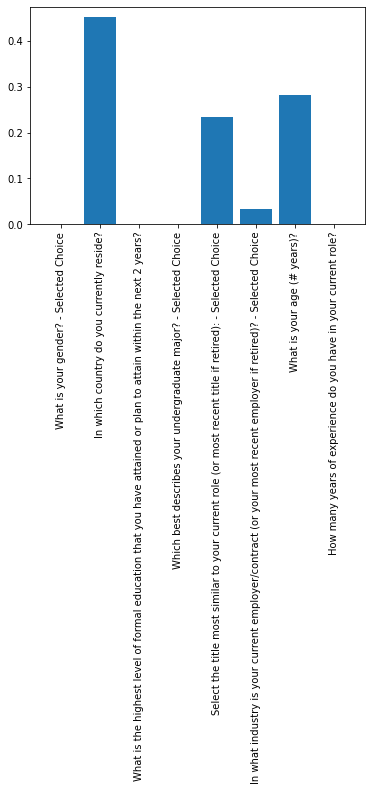

In [29]:

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
pyplot.show()

# Análise dos Resultados

Esse modelo sugere, que a variavel mais importante para a determinação do salário é o Pais de residência. Seguida da idade e do titulo.

Dessa forma, não conseguimos identificar um viés de genêro. O que não quer dizer que ele não exista, mas que esse padrão não foi identificado na nossa amostra. 

Algumas análises adicionais que podemos fazer, é por exemplo, fazer o que chamamos de pareamento. Selecionar pessoas do mesmo país e com o mesmo titulo e tentar identificar se existe um viés. 

In [31]:
df_modelo.iloc[:,1].value_counts() # vamos selecionar todos do pais 11 --> United States of America                                


8     6115
11    4151
5     3472
2     1349
7      871
9      743
0      654
4      643
10     616
1      529
3      524
6      518
Name: In which country do you currently reside?, dtype: int64

In [32]:
df_modelo.iloc[:,4].value_counts() # vamos pegar todos da profissao 7 - Data scientist

20    4350
7     3902
18    2936
4     1776
12    1254
16    1131
2      739
0      729
5      694
15     570
9      562
14     409
1      342
19     223
3      138
10     111
8      110
17      98
13      93
6       18
Name: Select the title most similar to your current role (or most recent title if retired): - Selected Choice, dtype: int64

In [33]:
df_modelo2 = df_modelo[(df_modelo.iloc[:,1] == 11) & (df_modelo.iloc[:,4] == 7) ]
# df_modelo2 = df_modelo[(df_modelo.iloc[:,4] == 14) ]

In [34]:
df_modelo2 = df_modelo2.drop(['In which country do you currently reside?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=1)
# df_modelo2 = df_modelo2.drop(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], axis=1)

In [35]:
X = df_modelo2.drop('What is your current yearly compensation (approximate $USD)?', axis=1)
y = df_modelo2['What is your current yearly compensation (approximate $USD)?']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [37]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)

# Predict
y_pred = regr_1.predict(X_test)

In [38]:
mean_absolute_error(y_test, y_pred)

52.11869185263258

In [39]:
features_n = X.columns

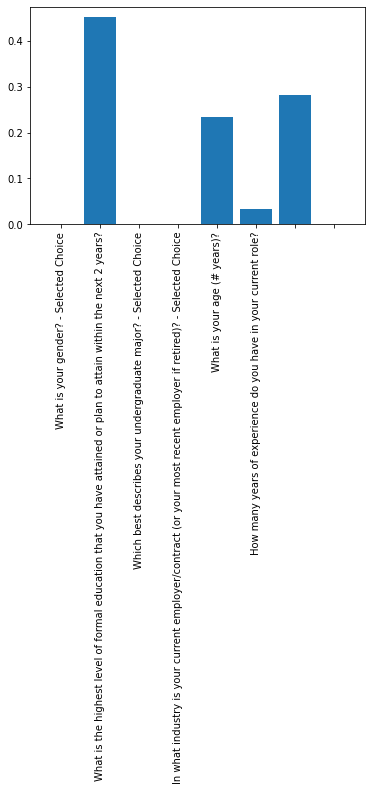

In [40]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
pyplot.show()

Outra hipotese que podemos levantar aqui é o desbalanceamento da base: 
    

In [41]:
df_modelo2.iloc[:,0].value_counts(normalize=True)

1    0.745011
0    0.231707
2    0.023282
Name: What is your gender? - Selected Choice, dtype: float64

In [42]:
df_modelo2.iloc[:,0].value_counts()

1    672
0    209
2     21
Name: What is your gender? - Selected Choice, dtype: int64

Vamos normalizar colocando a mesma quantidade de homens e mulheres! 

In [43]:
from sklearn.utils import resample

In [44]:
# Separate majority and minority classes
df_majority = df_modelo2[df_modelo2.iloc[:,0]==1]
df_minority = df_modelo2[df_modelo2.iloc[:,0]==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=209,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.iloc[:,0].value_counts()

1    209
0    209
Name: What is your gender? - Selected Choice, dtype: int64

In [45]:
df_majority_downsampled.head()

,What is your gender? - Selected Choice,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,What is your age (# years)?,How many years of experience do you have in your current role?,What is your current yearly compensation (approximate $USD)?
4217,1,3,8,3,34,3,125
9250,1,3,12,11,39,15,100
2579,1,0,3,16,24,1,100
15649,1,3,2,14,29,4,200
16156,1,3,8,3,29,2,250


In [46]:
X = df_majority_downsampled.drop('What is your current yearly compensation (approximate $USD)?', axis=1)
y = df_majority_downsampled['What is your current yearly compensation (approximate $USD)?']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [48]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)

# Predict
y_pred = regr_1.predict(X_test)

In [49]:
mean_absolute_error(y_test, y_pred)

73.7766654322858

In [50]:
features_n = X.columns

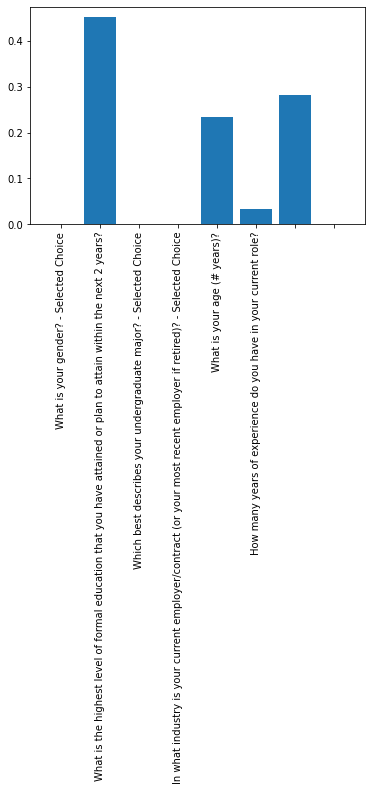

In [51]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks([x for x in range(len(importance))], features_n, rotation='vertical')
pyplot.show()